In [1]:
def alg1(data):
    data = list(data)
    changes = True
    while changes:
        changes = False
        for i in range(len(data) - 1):
            if data[i + 1] < data[i]:
                data[i], data[i + 1] = data[i + 1], data[i]
                changes = True
    return data

def alg2(data):
    if len(data) <= 1:
        return data
    else:
        split = len(data) // 2
        left = iter(alg2(data[:split]))
        right = iter(alg2(data[split:]))
        result = []
        # note: this takes the top items off the left and right piles
        left_top = next(left)
        right_top = next(right)
        while True:
            if left_top < right_top:
                result.append(left_top)
                try:
                    left_top = next(left)
                except StopIteration:
                    # nothing remains on the left; add the right + return
                    return result + [right_top] + list(right)
            else:
                result.append(right_top)
                try:
                    right_top = next(right)
                except StopIteration:
                    # nothing remains on the right; add the left + return
                    return result + [left_top] + list(left)

In [2]:
data = [1,22,333,4444,55555]
alg1(data)

[1, 22, 333, 4444, 55555]

In [3]:
data = [66,6,666,666666,666666666666666,66666,66666666666]
alg2(data)

[6, 66, 666, 66666, 666666, 66666666666, 666666666666666]

In [4]:
def data1(n, sigma=10, rho=28, beta=8/3, dt=0.01, x=1, y=1, z=1):
    import numpy
    state = numpy.array([x, y, z], dtype=float)
    result = []
    for _ in range(n):
        x, y, z = state
        state += dt * numpy.array([
            sigma * (y - x),
            x * (rho - z) - y,
            x * y - beta * z
        ])
        result.append(float(state[0] + 30))
    return result

def data2(n):
    return list(range(n))

def data3(n):
    return list(range(n, 0, -1))

In [5]:
import numpy as np
from time import perf_counter
import matplotlib.pyplot as plt

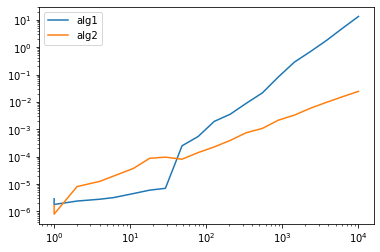

In [7]:
data = np.logspace(0,4,20)
data = [int(a) for a in data]
outcome1 = []
outcome2 = []
for i in data:
    data_sort = data1(i)
    start = perf_counter()
    alg1(data_sort)
    end = perf_counter()
    outcome1.append(end-start)
    
    data_sort = data1(i)
    start = perf_counter()
    alg2(data_sort)
    end = perf_counter()
    outcome2.append(end-start)
    
plt.loglog(data,outcome1, label='alg1')
plt.loglog(data,outcome2, label='alg2')
plt.legend()

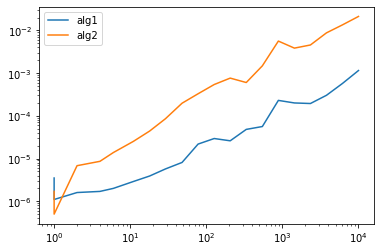

In [8]:
data = np.logspace(0,4,20)
data = [int(a) for a in data]
outcome1 = []
outcome2 = []
for i in data:
    data_sort = data2(i)
    start = perf_counter()
    alg1(data_sort)
    end = perf_counter()
    outcome1.append(end-start)
    
    data_sort = data2(i)
    start = perf_counter()
    alg2(data_sort)
    end = perf_counter()
    outcome2.append(end-start)
    
plt.loglog(data,outcome1, label='alg1')
plt.loglog(data,outcome2, label='alg2')
plt.legend()

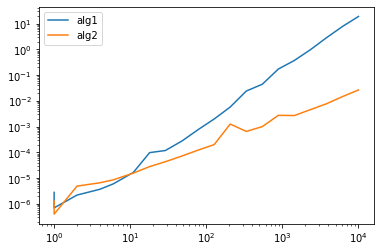

In [9]:
data = np.logspace(0,4,20)
data = [int(a) for a in data]
outcome1 = []
outcome2 = []
for i in data:
    data_sort = data3(i)
    start = perf_counter()
    alg1(data_sort)
    end = perf_counter()
    outcome1.append(end-start)
    
    data_sort = data3(i)
    start = perf_counter()
    alg2(data_sort)
    end = perf_counter()
    outcome2.append(end-start)
    
plt.loglog(data,outcome1, label='alg1')
plt.loglog(data,outcome2, label='alg2')
plt.legend()

In [ ]:
import multiprocessing
import time

def alg1(data):
    data = list(data)
    changes = True
    while changes:
        changes = False
        for i in range(len(data) - 1):
            if data[i + 1] < data[i]:
                data[i], data[i + 1] = data[i + 1], data[i]
                changes = True
    return data

def data1(n, sigma=10, rho=28, beta=8 / 3, dt=0.01, x=1, y=1, z=1):
    import numpy
    state = numpy.array([x, y, z], dtype=float)
    result = []
    for _ in range(n):
        x, y, z = state
        state += dt * numpy.array([
            sigma * (y - x),
            x * (rho - z) - y,
            x * y - beta * z
        ])
        result.append(float(state[0] + 30))
    return result


from multiprocessing import Process, Queue

def alg2(data):
    if len(data) <= 1:
        return data
    else:
        split = len(data) // 2
        left = iter(alg2(data[:split]))
        right = iter(alg2(data[split:]))
        result = []
        # note: this takes the top items off the left and right piles
        left_top = next(left)
        right_top = next(right)
        while True:
            if left_top < right_top:
                result.append(left_top)
                try:
                    left_top = next(left)
                except StopIteration:
                    # nothing remains on the left; add the right + return
                    return result + [right_top] + list(right)
            else:
                result.append(right_top)
                try:
                    right_top = next(right)
                except StopIteration:
                    # nothing remains on the right; add the left + return
                    return result + [left_top] + list(left)

def worker(data, id, return_dict):
    res = alg2(data)
    return_dict[id] = res

def new_alg2(data):

    split = len(data) // 2
    left = data[:split]
    right = data[split:]

    # never used queue for storing large amount of data!
    # q = Queue()
    # use manger instead
    manager = multiprocessing.Manager()
    return_dict = manager.dict()
    process_list = []

    p1 = Process(target=worker, args=(left,'left', return_dict))
    process_list.append(p1)
    p1.start()

    p2 = Process(target=worker, args=(right, 'right', return_dict))
    process_list.append(p2)
    p2.start()

    # wait for processes to finished
    p1.join()
    p2.join()

    # combined the result from the processes
    left = iter(list(return_dict['left']))
    right = iter(list(return_dict['right']))
    left_top = next(left)
    right_top = next(right)
    result = []
    while True:
        if left_top < right_top:
            result.append(left_top)
            try:
                left_top = next(left)
            except StopIteration:
                # nothing remains on the left; add the right + return
                return result + [right_top] + list(right)
        else:
            result.append(right_top)
            try:
                right_top = next(right)
            except StopIteration:
                # nothing remains on the right; add the left + return
                return result + [left_top] + list(left)


if __name__ == '__main__':
    data = data1(1000000)

    print('execution time for alg2: ', end="")
    start_time = time.time()
    alg2(data)
    end_time = time.time()
    print(end_time - start_time)

    print('execution time for multiprocessing alg2: ', end="")
    start_time = time.time()
    new_alg2(data)
    end_time = time.time()
    print(end_time - start_time)

    print('execution time for alg1: ', end="")
    start_time = time.time()
    alg1(data)
    end_time = time.time()
    print(end_time - start_time)



execution time for alg2: 3.6516101360321045
execution time for multiprocessing alg2: 